In [18]:
Salpeter = lambda M: M**-2.35 

def Kroupa(M):
    if M<.08: 
        alpha=.3
    elif M<.5:
        alpha=1.3
    else: 
        alpha=2.3
    return M**-alpha
    
def KroupaTopHeavy(M, alpha_heavy=2.3):
    if M<.08: 
        alpha=.3
    elif M<.5:
        alpha=1.3
    else: 
        alpha=alpha_heavy
    return M**-alpha
    
    
    
SalpeterTotalMass = lambda M: M**-2.35 *M

def KroupaTotalMass(M):
    if M<.08: 
        alpha=.3
    elif M<.5:
        alpha=1.3
    else: 
        alpha=2.3
    return M**-alpha * M 
    
def KroupaTopHeavyTotalMass(M, alpha_heavy=2.3):
    if M<.08: 
        alpha=.3
    elif M<.5:
        alpha=1.3
    else: 
        alpha=alpha_heavy
    return M**-alpha*M
    
    

N Type II SNR Kroupa 0.0116983553983
N Type II SNR Salpeter 0.00637750916316


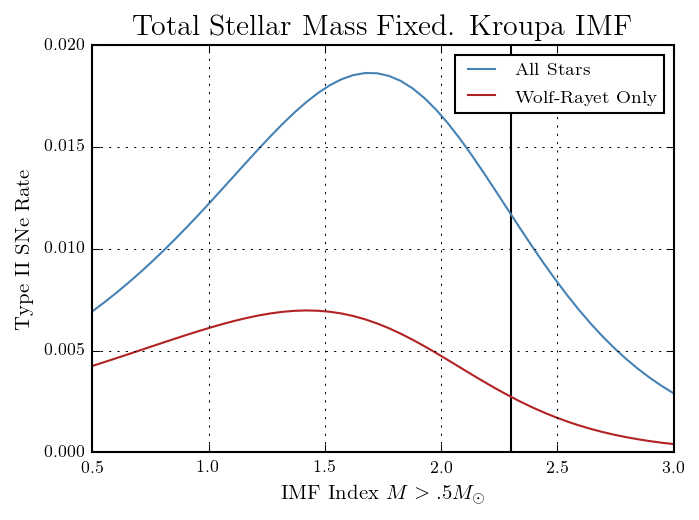

In [41]:
from scipy.integrate import quad


Kroupa_norm = quad(KroupaTotalMass, .08, 150)[0]
Salpeter_norm = quad(SalpeterTotalMass, .08, 150)[0]


# integrate the IMFS over the type II SNR range 8 M_solar to 50 M_solar 

print  'N Type II SNR Kroupa',   quad(Kroupa, 8, 50)[0]/Kroupa_norm
print  'N Type II SNR Salpeter', quad(Salpeter, 8, 50)[0]/Salpeter_norm


alphas =  np.linspace(.5,3, 50)
SNR_rates = []
WR_rates = []

for alpha in alphas:
    norm = quad(KroupaTopHeavyTotalMass, .08, 150, args=(alpha))[0]
    SNR_rates.append(  quad(KroupaTopHeavy, 8, 50, args=(alpha))[0]/norm )
    WR_rates.append(  quad(KroupaTopHeavy, 20, 50, args=(alpha))[0]/norm )
    
    
    
plt.plot(alphas, SNR_rates, label= 'All Stars')
plt.plot(alphas, WR_rates, label= 'Wolf-Rayet Only')
plt.ylabel('Type II SNe Rate')
plt.xlabel(r'IMF Index $M>.5 M_\odot$')
plt.title('Total Stellar Mass Fixed. Kroupa IMF')

plt.vlines(2.3, .00, .02)
plt.ylim(0,.02)
plt.legend()
plt.grid()

35


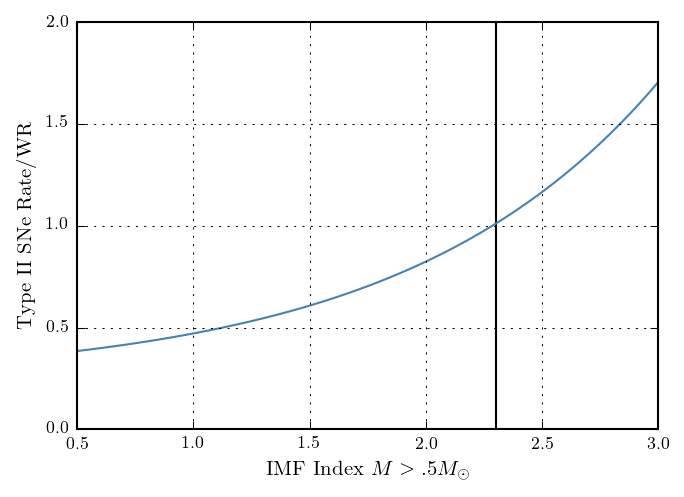

In [39]:

print np.argmin(np.abs(alphas-2.3))

plt.plot(alphas, np.array(SNR_rates)/np.array(WR_rates)/(np.array(SNR_rates[35])/np.array(WR_rates[35])), label= 'Type II SNR Rate')
plt.ylabel('Type II SNe Rate/WR')
plt.xlabel(r'IMF Index $M>.5 M_\odot$')

plt.vlines(2.3, .00, 2)
plt.grid()